# Labelme转mask-单张图像




## 导入工具包

In [1]:
import os
import json
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-20230816'

## 载入图像

In [3]:
img_path = 'mmsegmentation/LSR16F656/001 (1009).tiff'

In [4]:
img_bgr = cv2.imread(img_path)

In [5]:
img_bgr.shape

(240, 890, 3)

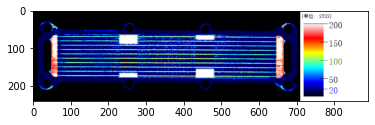

In [6]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 创建空白图像

0-背景

In [7]:
img_mask = np.zeros(img_bgr.shape[:2])

In [8]:
img_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

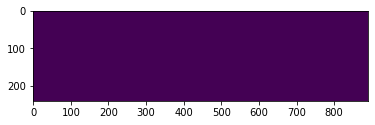

In [9]:
plt.imshow(img_mask)
plt.show()

## 载入该图像labelme格式的json标注文件

In [10]:
labelme_json_path = 'mmsegmentation/LSR16F656/001 (1009).json'

In [11]:
with open(labelme_json_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

In [12]:
labelme.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

## 元数据

In [13]:
labelme['version']

'5.2.1'

In [14]:
# 图像文件名
labelme['imagePath']

'001 (1009).tiff'

In [15]:
# 图像高度
labelme['imageHeight']

240

In [16]:
# 图像宽度
labelme['imageWidth']

890

## 该图中的所有标注信息

In [66]:
# labelme['shapes']

In [17]:
for each in labelme['shapes']:
    print(each['label'], each['shape_type'])

outer_ring polygon
inner_ring polygon


## 每个类别的信息及画mask的顺序（按照由大到小，由粗到精的顺序）

In [18]:
# 0-背景，从 1 开始
class_info = [
    {'label':'outer_ring', 'type':'polygon', 'color':1},                    # polygon 多段线
    {'label':'inner_ring', 'type':'polygon', 'color':2},
   
]

## 按顺序将mask绘制在空白图上

In [19]:
for one_class in class_info: # 按顺序遍历每一个类别
    for each in labelme['shapes']: # 遍历所有标注，找到属于当前类别的标注
        if each['label'] == one_class['label']:
            if one_class['type'] == 'polygon': # polygon 多段线标注
                
                # 获取点的坐标
                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                
                # 在空白图上画 mask（闭合区域）
                img_mask = cv2.fillPoly(img_mask, points, color=one_class['color'])
                
            elif one_class['type'] == 'line' or one_class['type'] == 'linestrip': # line 或者 linestrip 线段标注
                
                # 获取点的坐标
                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                
                # 在空白图上画 mask（非闭合区域）
                img_mask = cv2.polylines(img_mask, points, isClosed=False, color=one_class['color'], thickness=one_class['thickness']) 
            
            elif one_class['type'] == 'circle': # circle 圆形标注
                
                points = np.array(each['points'], dtype=np.int32)
                
                center_x, center_y = points[0][0], points[0][1] # 圆心点坐标
                
                edge_x, edge_y = points[1][0], points[1][1]     # 圆周点坐标
                
                radius = np.linalg.norm(np.array([center_x, center_y] - np.array([edge_x, edge_y]))).astype('uint32') # 半径
                
                img_mask = cv2.circle(img_mask, (center_x, center_y), radius, one_class['color'], one_class['thickness'])
            
            else:
                print('未知标注类型', one_class['type'])

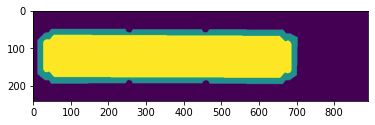

In [20]:
plt.imshow(img_mask)
plt.show()

## 保存mask标注图像（必须是png格式）

In [21]:
img_mask.shape

(240, 890)

In [22]:
mask_path = img_path.split('.')[0] + '.png'

In [27]:
print(img_path.split('.'))

['mmsegmentation/LSR16F656/001 (1009)', 'tiff']


In [23]:
cv2.imwrite(mask_path, img_mask)

True

## 载入mask标注图像

In [28]:
mask_img = cv2.imread('mmsegmentation/LSR16F656/001 (1009).png')

In [29]:
mask_img.shape

(240, 890, 3)

In [30]:
np.unique(mask_img)

array([0, 1, 2], dtype=uint8)

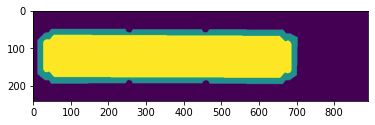

In [31]:
plt.imshow(mask_img[:,:,0])
plt.show()